In [1]:
import numpy as np
import pandas as pd
import scanpy as sc

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

#For editable text. Except latex text is still shapes sadly
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
sns.set_style("whitegrid")
font = {'size' : 6}
lines = {'linewidth' : 0.5}
fig = {'figsize' : (2.5, 1.5)}
mpl.rc('font', **font)
mpl.rc('lines', **lines)
mpl.rc('figure', **fig)
#Set style
sns.set(style="whitegrid", palette="pastel", color_codes=True)

# 02142021_suppFig7B_LiverTauGiniSigs.ipynb

In [2]:
def save_figure_pdf(fig, path_to_save):
	'''
	Utility fxn to save a figure without having to retype all the required options.
	Input:
		fig - a matplotlib.pyplot.figure instance with the figure you'd like to save
		path_to_save - the path you'd like to save the figure to
	Returns: Nothing but there should now be a pdf version in 300 dpi with a transparent bkg at path_to_save
	'''
	fig.savefig(path_to_save, dpi = 300,
                bbox_inches = 'tight', transparent = True)

In [3]:
thisTiss = "liver"

In [4]:
tissTau = pd.read_csv("../gini_tau/" + thisTiss + "_gini_tau_02142021.csv",
                     sep = ",", index_col = 0)

In [5]:
tissGini = "../../signatures_git/gini6_perCluster_liver_12102020.csv"
tissGini = pd.read_csv(tissGini, sep = ",", index_col = 0)

In [6]:
fullNames = [i.split("-")[0] for i in tissGini.columns]

In [7]:
tissGini.columns = fullNames

In [8]:
# exported off coolors

colors = {"Platinum":"eaeaea","Amaranth M P":"893168","Dark Purple":"4a1942",
          "Dark Purple 2":"2e1c2b","Rich Black FOGRA 39":"050404"}

# add the pound for matplotlib
for c in colors:
    colors[c] = "#" + colors[c]
colors = list(colors.values())

sns.color_palette(colors)

[(0.9176470588235294, 0.9176470588235294, 0.9176470588235294),
 (0.5372549019607843, 0.19215686274509805, 0.40784313725490196),
 (0.2901960784313726, 0.09803921568627451, 0.25882352941176473),
 (0.1803921568627451, 0.10980392156862745, 0.16862745098039217),
 (0.0196078431372549, 0.01568627450980392, 0.01568627450980392)]

In [9]:
cell_pal = {}
for i, cell in enumerate(fullNames):
    cell_pal[cell] = colors[i]

In [10]:
giniMelt = pd.melt(tissGini, value_vars = tissGini.columns)
tauMelt = pd.melt(tissTau, value_vars = tissTau.columns)

In [11]:
giniMelt[giniMelt['value'].notna()]

variable     value
0    EPCAM+ bile duct cells  0.838780
153             Hepatocytes  0.982820
154             Hepatocytes  0.632333
155             Hepatocytes  0.945837
156             Hepatocytes  0.741696
..                      ...       ...
451                    LSEC  0.896157
452                    LSEC  0.870031
453                    LSEC  0.909158
454                    LSEC  0.695994
607                    MVEC  0.639008

[152 rows x 2 columns]

In [12]:
degDict = {}
for i in tissGini:
    degDict[i] = tissGini[i].dropna().index.tolist()
    print(len(degDict[i]))

1
144
6
1


In [13]:
degTau = {}
for i in degDict:
    relENSG = degDict[i]
    tauVals = tissTau.loc[relENSG]["tau-" + thisTiss].tolist()
    degTau[i] = tauVals

# make a dataframe
tauDF = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in degTau.items() ]))

In [14]:
giniMelt = pd.melt(tissGini, value_vars = tissGini.columns)
tauMelt = pd.melt(tauDF, value_vars = tauDF.columns)

In [15]:
giniMelt = giniMelt[giniMelt['value'].notna()]
tauMelt =  tauMelt[tauMelt['value'].notna()]

In [16]:
giniMelt = giniMelt[giniMelt["variable"].isin(["Hepatocytes"])]
tauMelt = tauMelt[tauMelt["variable"].isin(["Hepatocytes"])]

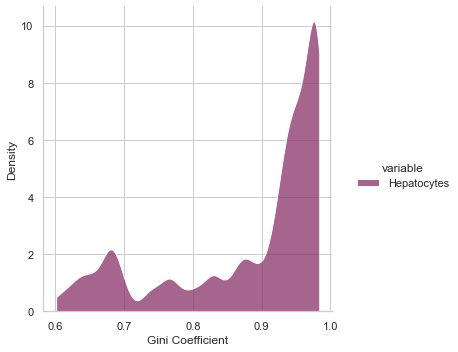

In [17]:
lowerBound = np.min(giniMelt["value"])
upperBound = np.max(giniMelt["value"])


g = sns.displot(giniMelt, x = "value", 
            multiple = "stack",
            kind = "kde",
            bw_adjust=.3,
            clip = (lowerBound, upperBound),
            hue = "variable",
            common_norm = False,
           palette = cell_pal)
g.set(xlabel = "Gini Coefficient", ylabel = "Density")

In [18]:
save_figure_pdf(g, thisTiss + "GiniCoefficient_Distrib_02152021.pdf")

In [19]:
clear all